<a href="https://colab.research.google.com/github/MMoltira/DataMining/blob/master/Expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/DWDM_material'

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
avg_Expenditure_1 = os.path.join(path,'avg_Expenditure_1.csv')

In [ ]:
avg_Expenditure_1 = pd.read_csv(avg_Expenditure_1)
avg_Expenditure_1

,จังหวัด,avg_expenditure
0,กรุงเทพมหานคร 53,30334.0
1,สมุทรปราการ 53,18450.0
2,นนทบุรี 53,29487.0
3,ปทุมธานี 53,22460.0
4,พระนครศรีอยุธยา 53,20717.0
...,...,...
226,ตรัง 55,20922.3
227,พัทลุง 55,16635.7
228,ปัตตานี 55,16668.1
229,ยะลา 55,12521.7


In [ ]:
avg_Expenditure_1.shape

(231, 2)

In [ ]:
avg_Expenditure_1.isnull().any()

จังหวัด            False
avg_expenditure     True
dtype: bool

In [ ]:
avg_Expenditure_1[['avg_expenditure']] = avg_Expenditure_1[['avg_expenditure']].fillna(0) 

In [ ]:
avg_Expenditure_1.isnull().any()

จังหวัด            False
avg_expenditure    False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xe = avg_Expenditure_1[['avg_expenditure']] #Xi ตัวแปรของค่าใช้จ่าย

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xe,y=make_blobs(n_samples=231, centers=4, n_features=2, random_state=6)

In [ ]:
Xe.shape 

(231, 2)

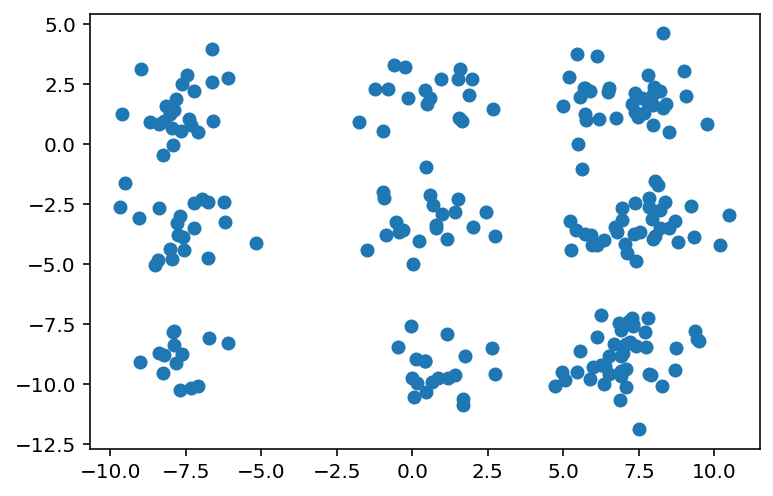

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xe[:,0],Xi[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xi) # predict ว่าอยู่ในกลุ่มไหน

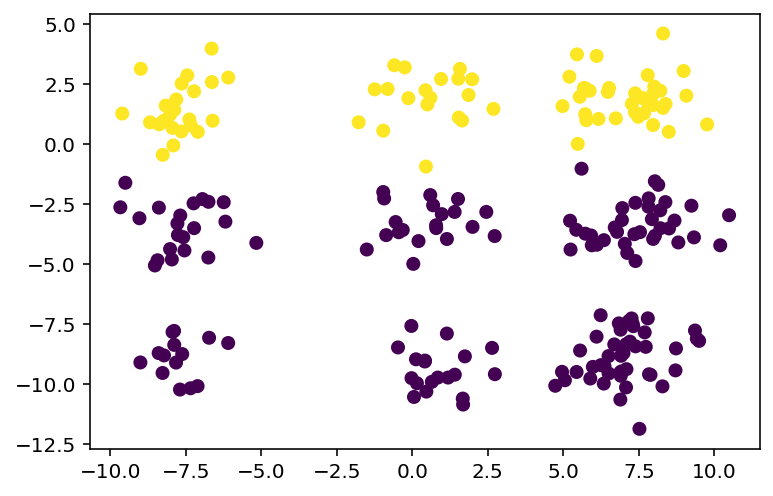

In [ ]:
plt.scatter(Xe[:,0], Xi[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachuke = 2 # จำนวนกระจุก
n_thamsame = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueake = np.random.choice(len(Xe),n_krachuke,replace=0)
X_cene = Xe[sumlueake] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsame):
    raya2e = ((X_cene[None]-Xe[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klume = raya2e.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maie = np.empty_like(X_cene) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachuke):
        if(len(Xe[klume==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maie[j] = Xe[klume==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maie[j] = Xe[np.random.randint(len(Xe))]
    if(np.allclose(X_cene,X_cen_maie,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cene = X_cen_maie
        break
    X_cene = X_cen_maie # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

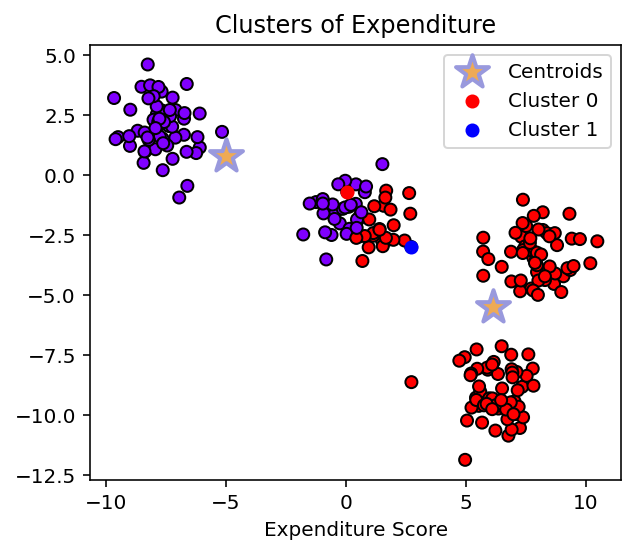

In [ ]:
raya2e = ((X_cene[None]-Xe[:,None])**2).sum(2)
ze = raya2e.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xe[:,0],Xe[:,1],c=ze,edgecolor='k',cmap='rainbow')
plt.scatter(X_cene[:,0],X_cene[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xe[0,0], Xe[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xe[1,0], Xe[1,1], c = 'blue', label = 'Cluster 1')
plt.title('Clusters of Expenditure')
plt.xlabel('Expenditure Score')
plt.legend()
plt.show()

In [ ]:
ssee = 0
for i in range(n_krachuke):
    ssee += np.sum(raya2e[ze==i,i])
print(ssee)

3827.936922165727


In [ ]:
KMclust.cluster_centers_

array([[ 6.75152364, -5.91936113],
       [-4.12560165,  0.37783701]])

In [ ]:
KMclust.transform(Xe) # the distance between each point and centroid

array([[ 8.49095676,  4.31770556],
       [ 4.97360404,  7.63892636],
       [ 3.91671774, 12.62594023],
       [17.90170884,  5.5094632 ],
       [ 4.6527848 , 15.77802464],
       [ 2.96883283, 14.71336771],
       [ 9.19817054,  3.69458891],
       [ 1.49391986, 12.03312064],
       [ 2.38708757, 14.60823379],
       [ 2.34635993, 13.15386759],
       [ 3.86154095, 12.82029252],
       [ 6.12395059,  6.44688194],
       [ 2.68986547, 12.54525894],
       [ 7.44873202,  5.14272332],
       [ 2.27742269, 13.07926073],
       [ 9.32271204,  3.25016402],
       [ 1.54118436, 12.90915607],
       [ 6.48822855,  6.10430737],
       [ 5.92482191,  7.0969365 ],
       [16.62813951,  4.29586678],
       [16.90455017,  4.33607622],
       [ 3.73372196, 15.03105507],
       [ 6.55282137,  6.01828981],
       [15.39899388,  2.94756218],
       [14.66280001,  2.11439537],
       [ 3.5280767 , 14.86276077],
       [ 2.40808921, 13.09134814],
       [ 4.84740601, 11.32431572],
       [ 3.39947272,

In [ ]:
KMclust.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

In [ ]:
ssde=[] #เซทว่างของรายได้
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xe) #Xi ตัวแปรของรายได้
    ssde.append([k, m.inertia_])
ssde

[[2, 3808.025083086262],
 [3, 1472.7397344707779],
 [4, 434.8621723093945],
 [5, 387.08764317414074],
 [6, 347.90136253221664],
 [7, 305.8306786100441],
 [8, 267.0189140880368],
 [9, 244.83259980602207]]

In [ ]:
xye=np.array(ssde) #xyi ตัวแปร xy ของรายได้
print(xye)

[[2.00000000e+00 3.80802508e+03]
 [3.00000000e+00 1.47273973e+03]
 [4.00000000e+00 4.34862172e+02]
 [5.00000000e+00 3.87087643e+02]
 [6.00000000e+00 3.47901363e+02]
 [7.00000000e+00 3.05830679e+02]
 [8.00000000e+00 2.67018914e+02]
 [9.00000000e+00 2.44832600e+02]]


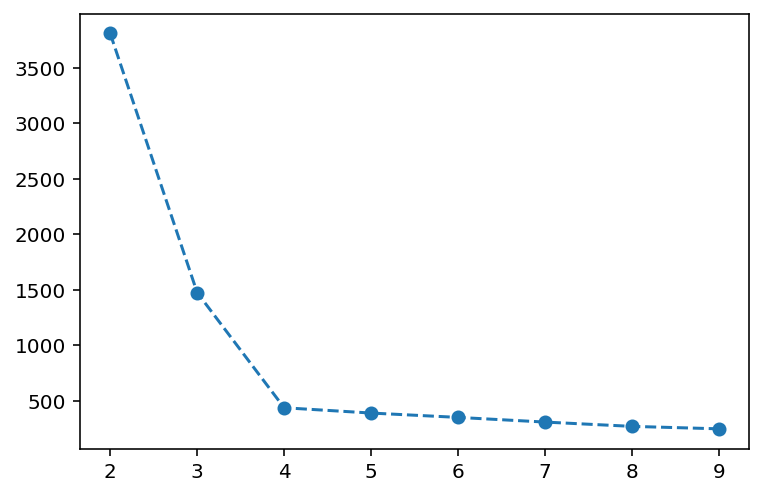

In [ ]:
plt.plot(xye[:, 0], xye[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [ ]:
dde=pd.DataFrame(ssde, columns=['k', 'ssde']) 
dde #ddi ตัวแปรของรายได้

,k,ssde
0,2,3808.025083
1,3,1472.739734
2,4,434.862172
3,5,387.087643
4,6,347.901363
5,7,305.830679
6,8,267.018914
7,9,244.832600


In [ ]:
dde['pct_chg']=dde['ssde'].pct_change() * 100
dde

,k,ssde,pct_chg
0,2,3808.025083,NaN
1,3,1472.739734,-61.325367
2,4,434.862172,-70.472571
3,5,387.087643,-10.986131
4,6,347.901363,-10.123361
5,7,305.830679,-12.092705
6,8,267.018914,-12.690605
7,9,244.832600,-8.308892


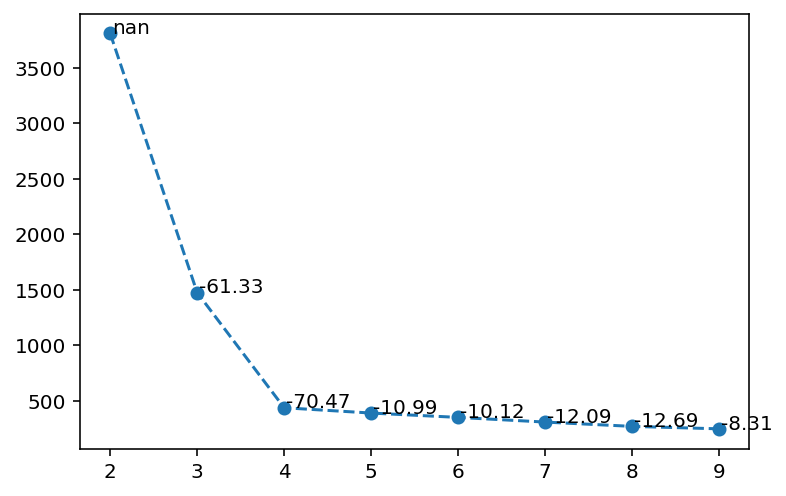

In [ ]:
plt.plot(dde['k'], dde['ssde'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dde.iterrows():
    plt.text(row['k']+.02, row['ssde']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

In [ ]:
avg_Expenditure_1['cluster']=KMclust.labels_
avg_Expenditure_1.head()

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,1
1,สมุทรปราการ 53,18450.0,0
2,นนทบุรี 53,29487.0,0
3,ปทุมธานี 53,22460.0,1
4,พระนครศรีอยุธยา 53,20717.0,0


In [ ]:
avg_Expenditure_1.groupby('cluster').describe().T

cluster                           0             1
avg_expenditure count    126.000000    105.000000
                mean   15988.019841  16471.426667
                std     4478.505207   5143.747580
                min        0.000000      0.000000
                25%    13249.150000  13148.800000
                50%    15558.650000  15347.500000
                75%    18464.550000  18993.200000
                max    29969.200000  35023.700000

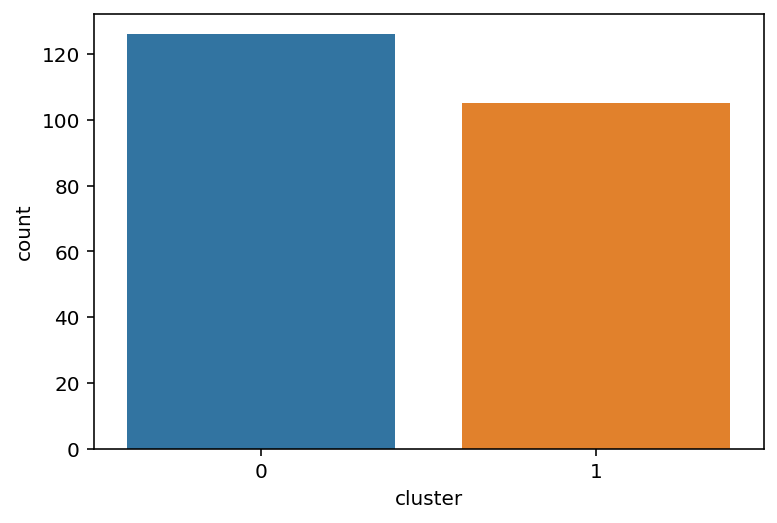

In [ ]:
sns.countplot(x='cluster', data=avg_Expenditure_1)

In [ ]:
avg_Expenditure_1

,จังหวัด,avg_expenditure,cluster
0,กรุงเทพมหานคร 53,30334.0,1
1,สมุทรปราการ 53,18450.0,0
2,นนทบุรี 53,29487.0,0
3,ปทุมธานี 53,22460.0,1
4,พระนครศรีอยุธยา 53,20717.0,0
...,...,...,...
226,ตรัง 55,20922.3,1
227,พัทลุง 55,16635.7,0
228,ปัตตานี 55,16668.1,0
229,ยะลา 55,12521.7,1


In [ ]:
avg_Expenditure_1.groupby('cluster').head().sort_values('cluster')

,จังหวัด,avg_expenditure,cluster
1,สมุทรปราการ 53,18450.0,0
2,นนทบุรี 53,29487.0,0
4,พระนครศรีอยุธยา 53,20717.0,0
5,อ่างทอง 53,20773.0,0
7,สิงห์บุรี 53,17787.0,0
0,กรุงเทพมหานคร 53,30334.0,1
3,ปทุมธานี 53,22460.0,1
6,ลพบุรี 53,16764.0,1
13,ตราด 53,13365.0,1
15,ปราจีนบุรี 53,18472.0,1
